## #1. Calculating Probabilities

In [13]:
# Y ~ N(mu,sigma2) mu= 5, sigma2= 2 
mu <- 5 
sigma2 <- 2
sigma <- sqrt(sigma2)

### P(µ − σ ≤ Y ≤ µ + σ)

In [10]:
pnorm(mu+sigma, mu,sigma) - pnorm(mu-sigma,mu,sigma)

[1] 0.6826895

### P(µ − 2σ ≤ Y ≤ µ + 2σ)

In [11]:
pnorm(mu+2*sigma, mu,sigma) - pnorm(mu-2*sigma,mu,sigma)

[1] 0.9544997

### P(µ − 3σ ≤ Y ≤ µ + 3σ)

In [12]:
pnorm(mu+3*sigma, mu,sigma) - pnorm(mu-3*sigma,mu,sigma)

[1] 0.9973002

### js: 2/2

## #2. Expected Value and Variance

### Calculations

* **Expected Value of uniform distribution on interval [0,1]**

   $$ E[X] = \int_{a}^b xf(x)dx = \int_{0}^1 xf(x)dx  =  1 / 2 = 0.5$$

* **Variance of uniform distribution on [0,1]**

   $$ Var(X) =E(X^2) - E^2(X) = \int_{a}^b x^2/(b -a) dx - ((b -a)/2)^2 = (b - a)^2/12 = 1^2 / 12 = 1/12 $$

In [150]:
#check
u<-runif(1000, min=0, max=1) # large enough samples
mu_u <- mean(u) # expected value theoretically ==> E(X)=0.5
var_u <- var(u) # variance theoretically ==> 0.083333333333
mu_u
var_u

[1] 0.5120868

[1] 0.08311097

### js: I asked for mean and variance of $Y$ not $U_i$

### Simulation

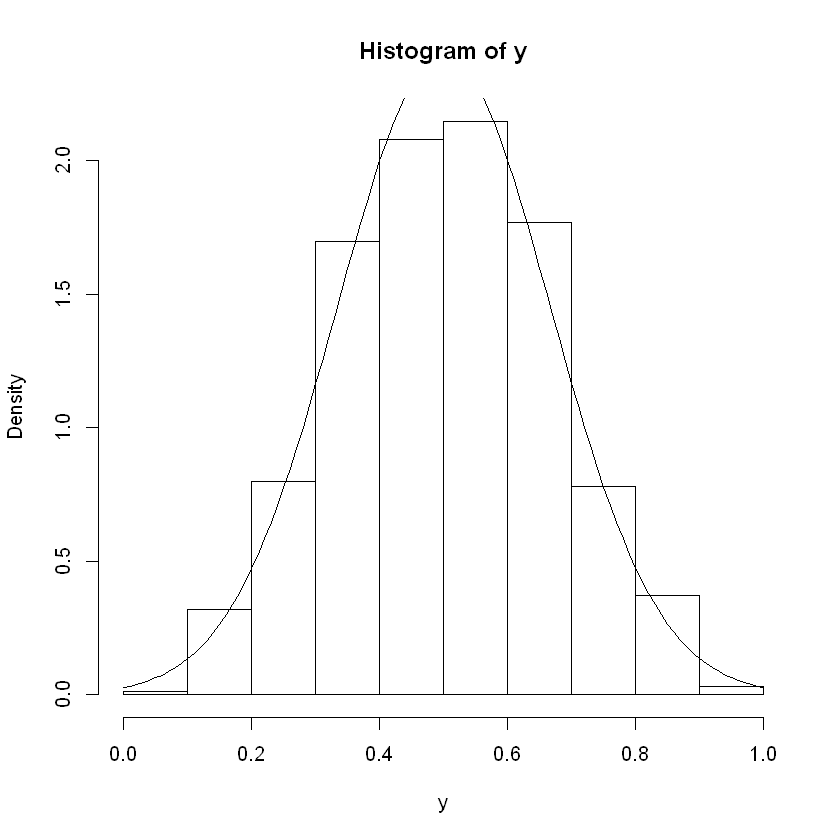

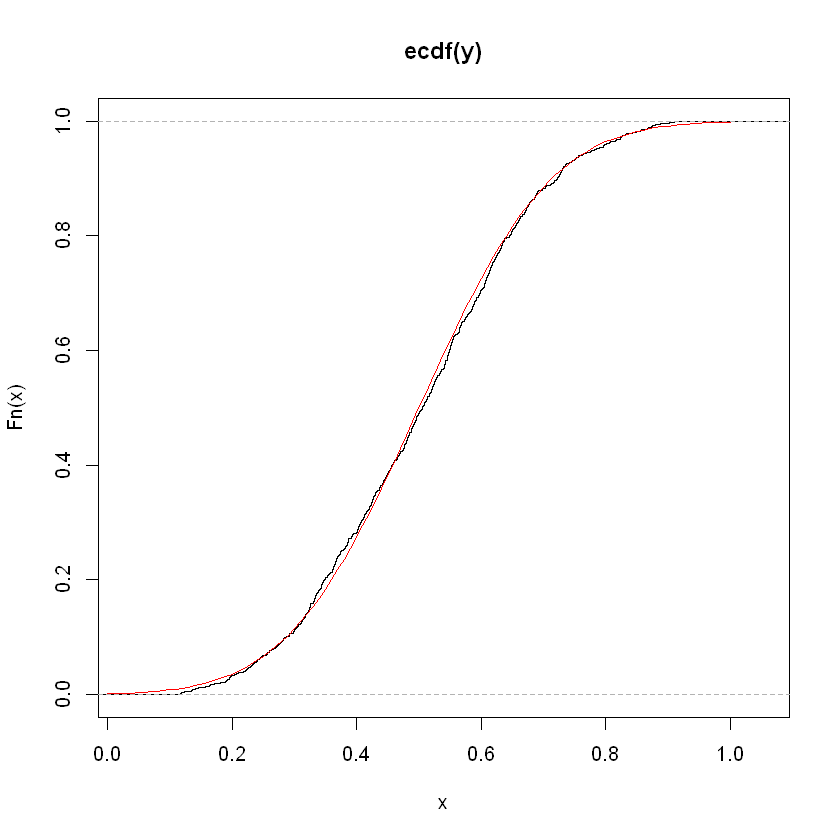

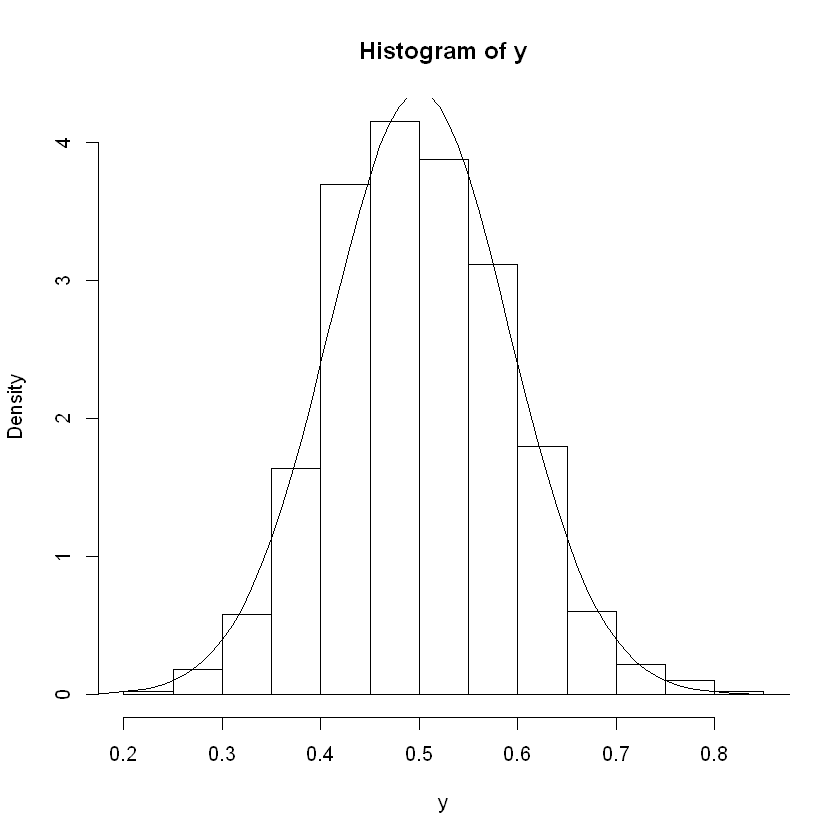

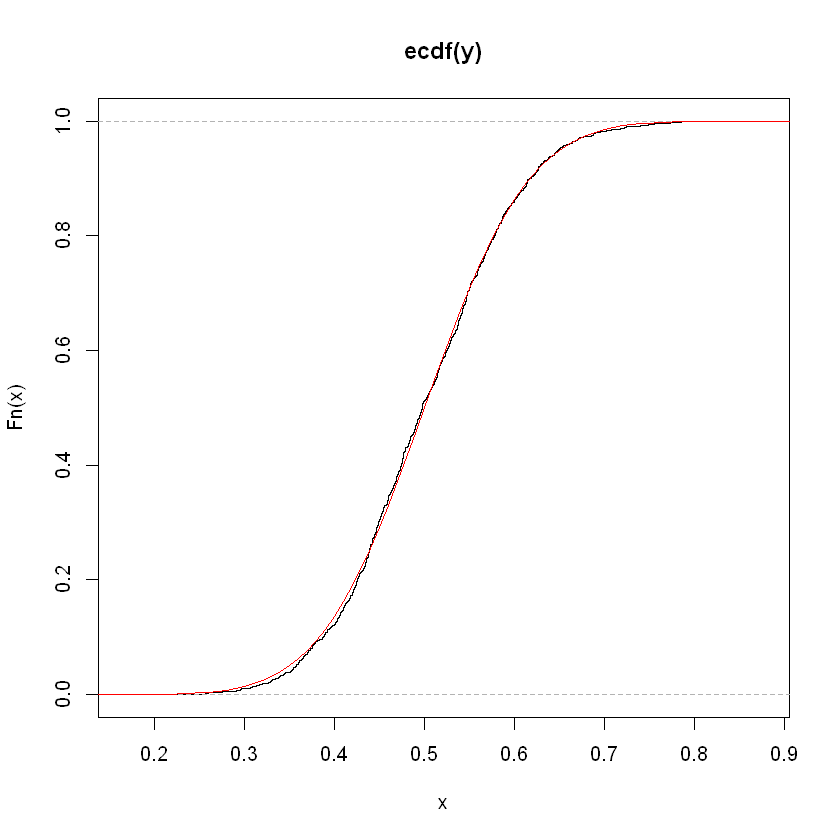

In [3]:
# For k=3
k = 3


y = sum(runif(k))/k
for (i in 1:1000) {
  new_element = sum(runif(k))/k
  y = c(y,new_element)}

hist(y, freq=F)

#Comparison with Normal distributon:
z = seq(0,1,0.01)
points(z, dnorm(z, mean= 1/2, sd=sqrt(1/(12*k))), type="l")

plot (ecdf(y))
points(z, pnorm(z, mean= 1/2, sd=sqrt(1/(12*k))), type="l", col=2)

# For k=10
k = 10

y = sum(runif(k))/k
for (i in 1:1000) {
  new_element = sum(runif(k))/k
  y = c(y,new_element)}

###js: here you missed to plot the histogram
hist(y, freq=F)
z = seq(0,1,0.01)
points(z, dnorm(z, mean= 1/2, sd=sqrt(1/(12*k))), type="l")

plot (ecdf(y))
points(z, pnorm(z, mean= 1/2, sd=sqrt(1/(12*k))), type="l", col=2)



In [ ]:
### js: noch 4/4

## #3. Pseudo observations simulations

#### Dataset 'soilrespiration.csv' is in same location as the notebook

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)
soilrespiration <- read.csv('soilrespiration.csv')
x <- soilrespiration$temp
b1.seq <- seq(-1, 0, 0.001)
b2.seq <- seq(0, 0.1, 1e-04)

In [7]:
gridsearch <- function(b1.seq, b2.seq, criterion,x,y.sim) {
    result <- matrix(0, length(b1.seq), length(b2.seq))
    for (i in 1:length(b1.seq)) {
        for (j in 1:length(b2.seq)) {
            result[i, j] <- criterion(b1.seq[i], b2.seq[j],x,y.sim)
        }
    }
    indices <- which(result == min(result), arr.ind = T)
    return(c(b1.seq[indices[1, 1]], b2.seq[indices[1, 2]]))
}

criterion1 <- function(b1, b2,x,y.sim) {
    sum( (y.sim - (b1 + b2 * x))^2 )
}
criterion2 <- function(b1, b2,x,y.sim) {
    sum(abs(y.sim - (b1 + b2 * x)))
}
criterion3 <- function(b1, b2,x,y.sim) {
    sum((y.sim - (b1 + b2 * x))^4)
}

In [8]:
beta1 <- -0.7
beta2 <- 0.075
sigma2 <- 0.07
mus  <- beta1+beta2*x
beta1.c1<-c()
beta2.c1<-c()
beta1.c2<-c()
beta2.c2<-c()
beta1.c3<-c()
beta2.c3<-c()
for (i in 1:100){
    y.sim <- rnorm(length(x), mean=mus, sd = sqrt(sigma2))
    betas1<-gridsearch(b1.seq,b2.seq,criterion1,x,y.sim)
    beta1.c1<- append(beta1.c1,betas1[1])
    beta2.c1<- append(beta2.c1,betas1[2])
}
for (i in 1:100){
    y.sim <- rnorm(length(x), mean=mus, sd = sqrt(sigma2))
    betas2<-gridsearch(b1.seq,b2.seq,criterion2,x,y.sim)
    beta1.c2<- append(beta1.c2,betas2[1])
    beta2.c2<- append(beta2.c2,betas2[2])
}
for (i in 1:100){
    y.sim <- rnorm(length(x), mean=mus, sd = sqrt(sigma2))
    betas3<-gridsearch(b1.seq,b2.seq,criterion3,x,y.sim)
    beta1.c3<- append(beta1.c3,betas3[1])
    beta2.c3<- append(beta2.c3,betas3[2])
}
beta.cr1 <- rbind(beta1.c1,beta2.c1)
beta.cr2 <- rbind(beta1.c2,beta2.c2)
beta.cr3 <- rbind(beta1.c3,beta2.c3)

In [9]:
print("For Criteria 1")
beta.cr1
print("For Criteria 2")
beta.cr2
print("For Criteria 3")
beta.cr3

[1] "For Criteria 1"


[,1]   [,2]    [,3]    [,4]    [,5]    [,6]    [,7]    [,8]   [,9]   
beta1.c1 -0.773 -0.6920 -0.5970 -0.6240 -0.7800 -0.7350 -0.6010 -0.610 -0.7520
beta2.c1  0.080  0.0729  0.0708  0.0723  0.0794  0.0758  0.0699  0.073  0.0782
         [,10]   [,11] [,12]   [,13]   [,14]   [,15]   [,16]   [,17]   [,18]  
beta1.c1 -0.5890 ...   -0.7220 -0.6360 -0.7280 -0.6590 -0.5270 -0.7970 -0.6310
beta2.c1  0.0711 ...    0.0774  0.0709  0.0738  0.0735  0.0684  0.0803  0.0703
         [,19]   [,20]   [,21]  
beta1.c1 -0.7160 -0.4170 -0.6590
beta2.c1  0.0779  0.0658  0.0741

[1] "For Criteria 2"


[,1]    [,2]    [,3]    [,4]    [,5]    [,6]    [,7]    [,8]    [,9]  
beta1.c2 -0.6720 -0.7520 -0.8400 -0.9650 -0.7310 -0.8080 -0.7950 -0..5700 -1.000
beta2.c2  0.0743  0.0766  0.0819  0.0856  0.0733  0.0781  0.0845  0..0694  0.084
         [,10]   [,11] [,12]   [,13]   [,14]   [,15]   [,16]   [,17]   [,18]  
beta1.c2 -0.8480 ...   -0.7920 -0.7160 -0.7410 -0.6590 -0.7400 -0.5390 -0.7380
beta2.c2  0.0845 ...    0.0792  0.0777  0.0783  0.0756  0.0782  0.0669  0.0745
         [,19]   [,20]   [,21]  
beta1.c2 -0.8590 -0.7920 -0.7400
beta2.c2  0.0839  0.0786  0.0757

[1] "For Criteria 3"


[,1]    [,2]    [,3]   [,4]    [,5]    [,6]    [,7]    [,8]    [,9]   
beta1.c3 -0.7110 -0.4440 -0.766 -0.6790 -0.6580 -0.8600 -0.5310 -0.7810 -0.9170
beta2.c3  0.0776  0.0619  0.076  0.0739  0.0718  0.0826  0.0683  0.0809  0.0858
         [,10]   [,11] [,12]   [,13]   [,14]   [,15]   [,16]   [,17]   [,18]  
beta1.c3 -0.7440 ...   -0.9070 -0.7390 -0.9020 -0.6830 -1.0000 -0.4350 -0.4930
beta2.c3  0.0774 ...    0.0856  0.0777  0.0849  0.0715  0.0847  0.0573  0.0675
         [,19]   [,20]   [,21]  
beta1.c3 -0.8970 -0.5370 -0.9030
beta2.c3  0.0837  0.0679  0.0829

### js: everything o.k. except that I asked for a graph instead for the raw numbers
### js: 3.5/4